In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op

In [48]:
# Carregue o arquivo Parquet
file_path = "C:/Users/kauea/OneDrive/Área de Trabalho/ERROR 404/Faculdade/Projeto-est-gio-Mercedes/Case/Case/veiculos.parquet"
Tabela1 = pd.read_parquet(file_path)

print(Tabela1.head())

  Linha CodPais           Denominação        varNED         NP   DTFLI  \
0     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952986  190109   
1     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952994  190110   
2     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953001  190110   
3     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953010  190110   
4     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953028  190110   

  DTLCO_1a   DTLCO   DTFAT  
0   150119  190115  190222  
1   110119  190111  190222  
2   100119  190110  190222  
3   100119  190110  190329  
4   120119  190112  190329  


In [35]:
# Carrega o arquivo Parquet com os dados dos países
Tabela2 = pd.read_parquet("C:/Users/kauea/OneDrive/Área de Trabalho/ERROR 404/Faculdade/Projeto-est-gio-Mercedes/Case/Case/cod_pais.parquet")
print(Tabela2.head())

   COD             PAIS   MERCADO
0  575   UNIAOSOVIETICA  Overseas
1  576  REPUBLICATCHECA  Overseas
2  577          ESPANHA  Overseas
3  579   REPUBLICACHECA  Overseas
4  580  REPUBL.ESLOVACA  Overseas


In [70]:
#Left Join dos dois Parquets
df_merged = pd.merge(Tabela1, Tabela2, on=['Codigo_Pais'], how='inner')
print(df_merged.head())

  Linha Codigo_Pais          Tipo_Veiculo Subtipo_Veiculo Numero_Registro  \
0     J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201952986   
1     J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201952994   
2     J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953001   
3     J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953010   
4     J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953028   

  Data_Producao Data_Liberacao_Parcial Data_Liberacao_Completa  \
0    2009-01-19             2019-01-15              2015-01-19   
1    2010-01-19             2019-01-11              2011-01-19   
2    2010-01-19             2019-01-10              2010-01-19   
3    2010-01-19             2019-01-10              2010-01-19   
4    2010-01-19             2019-01-12              2012-01-19   

  Data_Faturamento    PAIS MERCADO  
0       2022-02-19  BRASIL  Brasil  
1       2022-02-19  BRASIL  Brasil  
2       2022-02-19  BRASIL  B

In [67]:
# Renomear colunas para facilitar integração
Tabela1.rename(columns={'CodPais': 'Codigo_Pais', 'Denominação': 'Tipo_Veiculo', 
                    'varNED': 'Subtipo_Veiculo', 'NP': 'Numero_Registro', 
                    'DTFLI': 'Data_Producao', 'DTLCO_1a': 'Data_Liberacao_Parcial',
                    'DTLCO': 'Data_Liberacao_Completa', 'DTFAT': 'Data_Faturamento'}, inplace=True)
Tabela2.rename(columns={'COD': 'Codigo_Pais'}, inplace=True)


In [53]:
#Converte para DateTime os dados em object que precisam ser manipulados como data
date_columns = ['Data_Producao', 'Data_Liberacao_Parcial', 'Data_Liberacao_Completa', 'Data_Faturamento']
for col in date_columns:
    Tabela1[col] = pd.to_datetime(Tabela1[col], format='%d%m%y', errors='coerce')

In [54]:
# Remover duplicatas com base na chave primária (Numero_Registro)
Tabela1.drop_duplicates(subset='Numero_Registro', inplace=True)

# Preencher valores ausentes ou tratá-los conforme necessário
Tabela1.fillna({'Tipo_Veiculo': 'Desconhecido', 'Subtipo_Veiculo': 'Indefinido'}, inplace=True)


In [68]:
#Verificar colunas e tipos
print(Tabela1.info())
print("")
print(Tabela2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17233 entries, 0 to 17232
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Linha                    17233 non-null  object        
 1   Codigo_Pais              17233 non-null  object        
 2   Tipo_Veiculo             17233 non-null  object        
 3   Subtipo_Veiculo          17233 non-null  object        
 4   Numero_Registro          17233 non-null  object        
 5   Data_Producao            16407 non-null  datetime64[ns]
 6   Data_Liberacao_Parcial   16397 non-null  datetime64[ns]
 7   Data_Liberacao_Completa  15815 non-null  datetime64[ns]
 8   Data_Faturamento         14880 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(5)
memory usage: 1.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------

In [45]:
#Verificar estatísticas básicas
print(Tabela1.describe())

        Linha Codigo_Pais      Tipo_Veiculo Subtipo_Veiculo Numero_Registro  \
count   17233       17233             17233           17233           17233   
unique      2          26                58             394           17233   
top         J         BRA  OF-1721/59 EURO5    QVV17210737B       201952986   
freq    13719       13948              5178            1811               1   
first     NaN         NaN               NaN             NaN             NaN   
last      NaN         NaN               NaN             NaN             NaN   

              Data_Producao Data_Liberacao_Parcial Data_Liberacao_Completa  \
count                 16407                  16397                   15815   
unique                  291                    330                     330   
top     2004-10-19 00:00:00    2019-12-05 00:00:00     2027-08-19 00:00:00   
freq                     75                    108                     146   
first   2001-02-19 00:00:00    2019-01-09 00:00:00     2

C:\Users\kauea\AppData\Local\Temp\ipykernel_14260\1028886846.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(Tabela1.describe())
C:\Users\kauea\AppData\Local\Temp\ipykernel_14260\1028886846.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(Tabela1.describe())
C:\Users\kauea\AppData\Local\Temp\ipykernel_14260\1028886846.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  

In [42]:
#Filtrar apenas veículos de um certo tipo
filtered_df = Tabela1[Tabela1["Tipo_Veiculo"] == "O-500U 1826/59 EURO5"]
print(filtered_df)

      Linha Codigo_Pais          Tipo_Veiculo Subtipo_Veiculo Numero_Registro  \
0         J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201952986   
1         J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201952994   
2         J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953001   
3         J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953010   
4         J         BRA  O-500U 1826/59 EURO5    QVV18260809B       201953028   
...     ...         ...                   ...             ...             ...   
17208     L         BRA  O-500U 1826/59 EURO5    QVV18260942B       202247445   
17217     L         771  O-500U 1826/59 EURO5    QVV18260914B       202248280   
17222     L         771  O-500U 1826/59 EURO5    QVV18260914B       202248549   
17227     L         771  O-500U 1826/59 EURO5    QVV18260914B       202248794   
17232     L         771  O-500U 1826/59 EURO5    QVV18260914B       202248930   

      Data_Producao Data_Li

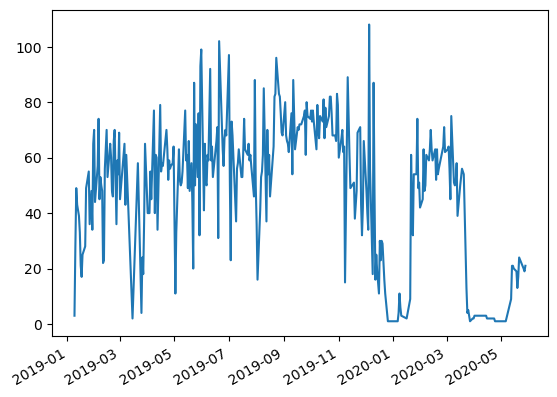

In [41]:
#Cria uma tabela genérica
Tabela1["Data_Liberacao_Parcial"].value_counts().plot(kind="line")
plt.show()

In [71]:
# Agrupar e contar veículos por país
veiculos_por_pais = df_merged.groupby('Codigo_Pais')['Numero_Registro'].count()
print(veiculos_por_pais)


Codigo_Pais
601       42
605       16
643        9
675        2
723        4
725      101
727        3
729        4
737        1
739        1
741        2
747       35
751        9
771      655
773        8
777     1079
779      221
785       49
787       38
789      764
793      216
843        1
869        1
882        3
901       21
BRA    13948
Name: Numero_Registro, dtype: int64


In [ ]:
# Salvar como Excel para trabalhar no PowerBI
Tabela1.to_excel('TabelaVeiculos.xlsx', index=False, engine='openpyxl')
Tabela2.to_excel('TabelaPaises.xlsx', index=False, engine='openpyxl')


print("Arquivo Excel salvo com sucesso!")

Arquivo Excel salvo com sucesso!
